# Ford Go Bike System Usage Pattern Feb'19
## Thamer Alqatari

## Investigation Overview


> A territorial bike-sharing program called Portage GoBike works within the Californian San Francisco Narrows Zone. With around 500,000 rides since its make a big appearance in 2017, Ford GoBike is the primary territorial and broad bike sharing framework set up in California and along the West Coast of the Joined together States. As of January 2018, it has around 10,000 yearly endorsers. The essential objective of this examination and visualization extend is to distinguish customer propensities and bicycle utilization designs utilizing information from one month's worth of riding trips in February of 2019.


## Dataset Overview

> The dataset presents a daily view of individual users trip data in February 2019. The information was stored in a comma-separated values file (csv) and contains 183,412 rows of datapoints.

In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
# load in the dataset into a pandas dataframe
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [10]:
# defining a function to explore and summarize datasets

def summary(df: pd.DataFrame) -> pd.DataFrame:
    """
    Returns the data type, # of null rows and unique rows of a given dataframe
    
    Args: 
        A dataframe of n_rows and n_columns
    Returns:
        A dataframe of 4 columns [data_type, non-null-rows, unique_rows, missing_rows]
    """
    concat = pd.concat(
        [df.dtypes.to_frame(), df.count().to_frame(), df.nunique(), df.isnull().sum()], axis=1
    )
    concat.columns = ['data_type', 'non-null-rows', 'unique_rows', 'missing_rows']
    return concat

In [11]:
# cleaning up the dataset

# casting the following variables into their correct/appropriate datatypes
bike_df = (
    bike_df
    .astype({'start_time': 'datetime64[ns]',
             'end_time': 'datetime64[ns]',
             'start_station_id': 'str',
             'end_station_id': 'str',
             'bike_id': 'str',
             'member_gender': 'category',
             'user_type': 'category'})
)

# adding age of riders 'age' column into dataset
# adding new columns - 'date, hour, day and month' for datetime formats
bike_df = (
    bike_df
    .assign(age=lambda a: 2022-a.member_birth_year,
            start_date=lambda sd: sd.start_time.dt.strftime('%Y-%m-%d'),
            start_hour=lambda x: x.start_time.dt.strftime('%H'),
            start_day=lambda x: x.start_time.dt.strftime('%A'),
            start_month=lambda x: x.start_time.dt.strftime('%B'))
)

# removing null/na numbers of members without age
bike_df = bike_df.dropna(subset=['age'])
# casting age into appropriate datatype (int)
bike_df = bike_df.astype({'age': 'int32'})

summary(bike_df)

,data_type,non-null-rows,unique_rows,missing_rows
duration_sec,int64,175147,4432,0
start_time,datetime64[ns],175147,175136,0
end_time,datetime64[ns],175147,175134,0
start_station_id,object,175147,330,0
start_station_name,object,174952,329,195
start_station_latitude,float64,175147,334,0
start_station_longitude,float64,175147,335,0
end_station_id,object,175147,330,0
end_station_name,object,174952,329,195
end_station_latitude,float64,175147,335,0


## (Visualization 1)

## User Types and their Daily Usage by Day

User types (subscribers and customers) contribute a majority of bike trips in February 2019. Subscribers use bikes more often than customers during the peak period on Thursday, but customers use bikes more often during the weekend.

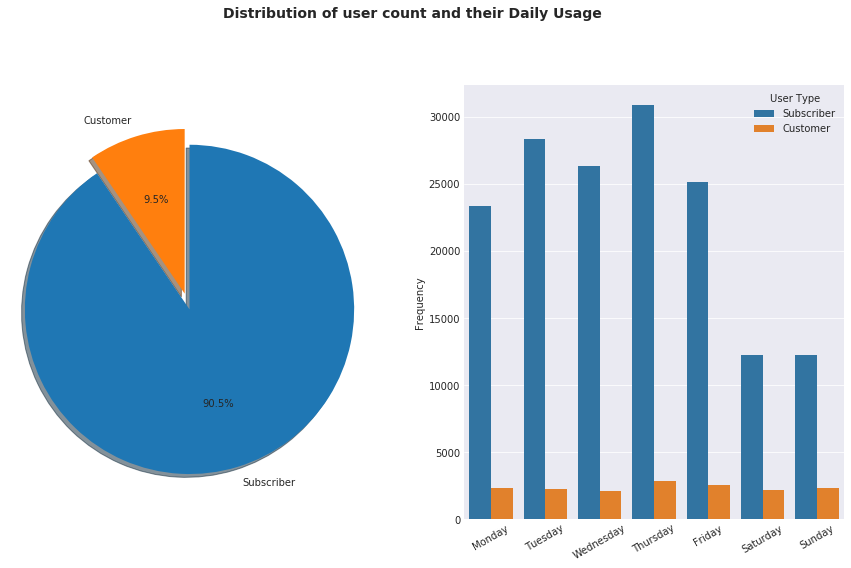

In [23]:
plt.figure(figsize=[15, 8]);
base_color = sb.color_palette('colorblind')[1];
sb.set_style('darkgrid');

plt.subplot(1, 2, 1);
sorted_vals = bike_df.user_type.value_counts()/bike_df.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

plt.subplot(1, 2, 2);
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_of_week_cat = pd.api.types.CategoricalDtype(ordered=True, categories=days_of_week)
bike_df = bike_df.astype({'start_day': days_of_week_cat})

ax = sb.countplot(data=bike_df, x='start_day', hue='user_type', hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.xlabel('');
plt.ylabel('Frequency');
plt.suptitle('Distribution of user count and their Daily Usage', fontsize=14, fontweight='semibold', y=1.015);

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

**Average trip duration in days of the week between user types**

As observed from the point plot, in general:
<br><br>
Guests took longer  passages as compared to Subscribers There's an increase( though more significant in guests) on increase in trip duration during the weekends The error bars give us an  sapience into the measure of central tendency between both  stoner types, whereby  guests  generally have a  important wider spread in trip duration- which is unlike the Subscribers who had a much more concentrated data spread, indicating that  druggies are more likely to have a trip duration close to the standard. This might be due to the terms of bike duration per trip(e.g, Subscribers have free  passages for the first xx  minutes,  later incurring  fresh charges after the  diurnal free trip duration.) 

Text(0,0.5,'Trip Duration (min)')

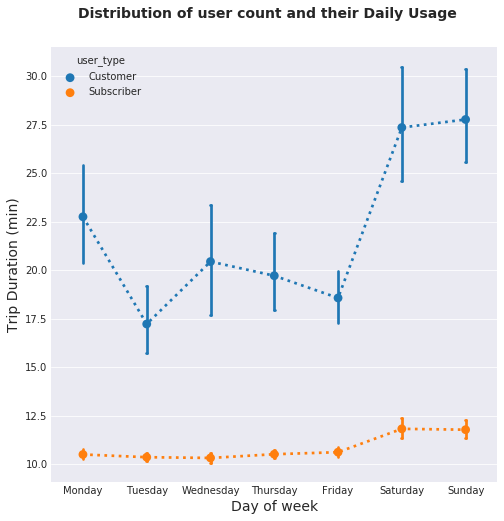

In [20]:
# figure size
plt.figure(figsize=[8,8])

# creating a minute column
bike_df['duration_min'] = bike_df['duration_sec']/60

# creating our pointplot
sb.pointplot(data=bike_df, x='start_day', y='duration_min', hue='user_type', capsize=0.01, linestyles=":")

# set title of the barplot
plt.suptitle('Distribution of user count and their Daily Usage', fontsize=14, fontweight='semibold', y=0.95);
# set x_label of plot
plt.xlabel('Day of week', fontsize=14)
# set y_label of plot
plt.ylabel('Trip Duration (min)', fontsize=14)

## Hourly usage between user types across days of the week

**It's egregious that the two types of riders have different  operation patterns and actions. On weekdays, Monday through Friday, subscribers made heavy use of the system, although weekend ridership was advanced, especially in the autumn. When  employed for exchanging to work, subscribers made a lot of peregrinations between 8 and 9 am and 5 to 6 pm on weekdays. still,non-subscribers tended to make further passages between 5 and 6 pm, Monday through Friday. In addition to the  colorful  operation objects, it could also be related to the original business conditions during these rush hours.**

## (Visualization 3)



In [14]:
# defining a function to transform our dataset
def heatmap_transform(df: pd.DataFrame, target:str) -> pd.DataFrame:
    """
    Returns a pivot table of frequency count per day, by the hour
    
    Args: 
        df - A dataframe of n_rows and n_columns
        target - user type we are interested in filtering for
    Returns:
        A pivot table
    """
    
    transformed_df = (
        df
        # filter out for given target argument
        .query(f'user_type == "{target}"')
        .groupby(['start_day', 'start_hour'])
        .size()
        .reset_index(name='count')
        .pivot(index='start_day', columns='start_hour', values='count')
        .fillna(0)
    )
    
    return transformed_df

cust_count = heatmap_transform(bike_df, 'Customer')

subs_count = heatmap_transform(bike_df, 'Subscriber')

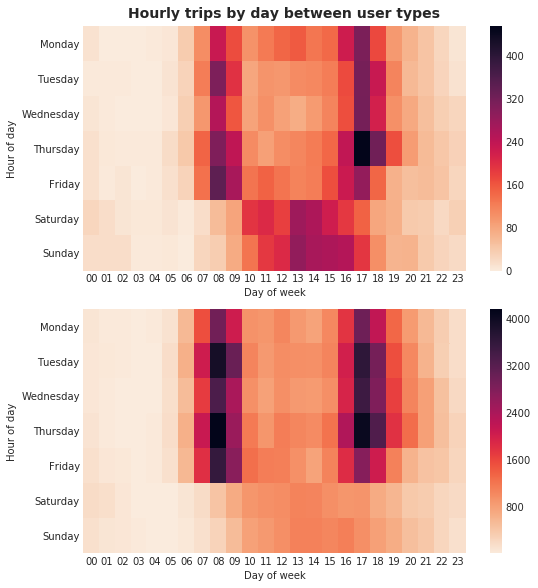

In [21]:
# figure size
plt.figure(figsize=[8,8])

# set title of the barplot
plt.suptitle('Hourly trips by day between user types', fontsize='14', fontweight='semibold', y=1.015)

# defining subplot 1
plt.subplot(2,1,1)
sb.heatmap(cust_count, cmap='rocket_r')
# set x_label of plot 1
plt.xlabel('Day of week', fontsize=10)
# set y_label of plot 1
plt.ylabel('Hour of day', fontsize=10)


# defining subplot 2
plt.subplot(2,1,2)
sb.heatmap(subs_count, cmap='rocket_r')
# set x_label of plot 2
plt.xlabel('Day of week', fontsize=10)
# set y_label of plot 2
plt.ylabel('Hour of day', fontsize=10)

plt.tight_layout()

## Summary

 Overall, there were a lot further subscribers than casual druggies of the bike- sharing system; both use it the most in the weekdays and smaller during the weekends. easily, the two groups of cyclists  parade colorful operation patterns and riding actions. For work- related commuting, subscribers tended to use the system heavily around ages of 8 am and 5 pm, whereas consumers frequently ride more on weekends and in the late  autumn. Subscriber operation is more effective because subscribers  frequently have shorter, hastily  peregrination than guests.

In [1]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 449040 bytes to Part_II_slide_deck_template.slides.html
